In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:39
🔁 Restarting kernel...


In [ ]:
!mamba install -c conda-forge rdkit

In [ ]:
!pip install git+https://github.com/bp-kelley/descriptastorus 
!pip install DeepPurpose

In [ ]:
import os
os.chdir('../')

import DeepPurpose.DTI as models
from DeepPurpose.utils import *
from DeepPurpose.dataset import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X_drug, X_target, y = load_process_DAVIS('./data/', binary=False)

Beginning Processing...
Beginning to extract zip file...
Default binary threshold for the binding affinity scores are 30, you can adjust it by using the "threshold" parameter
Done!


In [ ]:
print(dir(models))

['ATOM_FDIM', 'AllChem', 'BOND_FDIM', 'BPE', 'CNN', 'CNN_RNN', 'CalculateAADipeptideComposition', 'CalculateConjointTriad', 'Chem', 'Classifier', 'DBTA', 'DGL_AttentiveFP', 'DGL_GCN', 'DGL_GIN_AttrMasking', 'DGL_GIN_ContextPred', 'DGL_NeuralFP', 'DataStructs', 'Embeddings', 'Encoder_MultipleLayers', 'F', 'FingerprintMols', 'GetErGFingerprint', 'GetQuasiSequenceOrder', 'MAX_ATOM', 'MAX_BOND', 'MAX_NB', 'MAX_SEQ_DRUG', 'MAX_SEQ_PROTEIN', 'MLP', 'MPNN', 'OneHotEncoder', 'PrettyTable', 'SequentialSampler', 'SummaryWriter', 'URLs', 'Variable', 'ZipFile', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'amino_char', 'atom_features', 'average_precision_score', 'bond_features', 'bpe_codes_drug', 'bpe_codes_protein', 'calcPubChemFingerAll', 'codecs', 'concordance_index', 'convert_y_unit', 'copy', 'create_fold', 'create_fold_setting_cold_drug', 'create_fold_setting_cold_protein', 'create_var', 'data', 'data_process', 'data_process_DDI_loa

In [ ]:
drug_encoding = 'CNN'
target_encoding = 'CNN'
train, val, test = data_process(X_drug, X_target, y, 
                                drug_encoding, target_encoding, 
                                split_method='random',frac=[0.7,0.1,0.2])
config = generate_config(drug_encoding = drug_encoding, 
                         target_encoding = target_encoding, 
                         cls_hidden_dims = [1024,1024,512], 
                         train_epoch = 100, 
                         LR = 0.001, 
                         batch_size = 256,
                         cnn_drug_filters = [32,64,96],
                         cnn_target_filters = [32,64,96],
                         cnn_drug_kernels = [4,6,8],
                         cnn_target_kernels = [4,8,12]
                        )
model = models.model_initialize(**config)
print(dir(model))

Drug Target Interaction Prediction Mode...
in total: 30056 drug-target pairs
encoding drug...
unique drugs: 68
encoding protein...
unique target sequence: 379
splitting dataset...
Done.
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'binary', 'config', 'device', 'drug_encoding', 'load_pretrained', 'model', 'model_drug', 'model_protein', 'predict', 'result_folder', 'save_model', 'target_encoding', 'test_', 'train']


Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 29.5671. Total time 0.0 hours
Validation at Epoch 1 with loss:0.76187, MSE: 0.76707 , Pearson Correlation: 0.40621 with p-value: 8.23E-120 , Concordance Index: 0.72960
Training at Epoch 2 iteration 0 with loss 0.75797. Total time 0.02388 hours
Validation at Epoch 2 with loss:0.45142, MSE: 0.63272 , Pearson Correlation: 0.48771 with p-value: 1.93E-179 , Concordance Index: 0.76687
Training at Epoch 3 iteration 0 with loss 0.60369. Total time 0.04527 hours
Validation at Epoch 3 with loss:0.66287, MSE: 0.57757 , Pearson Correlation: 0.54686 with p-value: 4.30E-234 , Concordance Index: 0.78100
Training at Epoch 4 iteration 0 with loss 0.44767. Total time 0.06638 hours
Validation at Epoch 4 with loss:0.53100, MSE: 0.55616 , Pearson Correlation: 0.57749 with p-value: 5.62E-267 , Concordance Index: 0.79646
Training at Epoch 5 iteration 0 with loss 0.54094. Total time 0.08777 hours
Valida

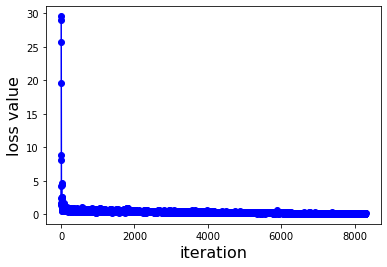

In [ ]:
model = models.model_initialize(**config)
model.train(train, val, test)

In [ ]:
model.save_model('/content/drive/MyDrive/')

In [ ]:
net = models.model_pretrained("/content/drive/MyDrive/")
net.config

{'LR': 0.001,
 'batch_size': 256,
 'binary': False,
 'cls_hidden_dims': [1024, 1024, 512],
 'cnn_drug_filters': [32, 64, 96],
 'cnn_drug_kernels': [4, 6, 8],
 'cnn_target_filters': [32, 64, 96],
 'cnn_target_kernels': [4, 8, 12],
 'cuda_id': None,
 'decay': 0,
 'drug_encoding': 'CNN',
 'hidden_dim_drug': 256,
 'hidden_dim_protein': 256,
 'input_dim_drug': 1024,
 'input_dim_protein': 8420,
 'num_workers': 0,
 'result_folder': './result/',
 'target_encoding': 'CNN',
 'test_every_X_epoch': 20,
 'train_epoch': 100}

In [ ]:
model.config

{'LR': 0.001,
 'batch_size': 256,
 'binary': False,
 'cls_hidden_dims': [1024, 1024, 512],
 'cnn_drug_filters': [32, 64, 96],
 'cnn_drug_kernels': [4, 6, 8],
 'cnn_target_filters': [32, 64, 96],
 'cnn_target_kernels': [4, 8, 12],
 'cuda_id': None,
 'decay': 0,
 'drug_encoding': 'CNN',
 'hidden_dim_drug': 256,
 'hidden_dim_protein': 256,
 'input_dim_drug': 1024,
 'input_dim_protein': 8420,
 'num_workers': 0,
 'result_folder': './result/',
 'target_encoding': 'CNN',
 'test_every_X_epoch': 20,
 'train_epoch': 100}

In [ ]:
X_drug = ['CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC=C4)N']
X_target = ['MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQVTVDEVLAEGGFAIVFLVRTSNGMKCALKRMFVNNEHDLQVCKREIQIMRDLSGHKNIVGYIDSSINNVSSGDVWEVLILMDFCRGGQVVNLMNQRLQTGFTENEVLQIFCDTCEAVARLHQCKTPIIHRDLKVENILLHDRGHYVLCDFGSATNKFQNPQTEGVNAVEDEIKKYTTLSYRAPEMVNLYSGKIITTKADIWALGCLLYKLCYFTLPFGESQVAICDGNFTIPDNSRYSQDMHCLIRYMLEPDPDKRPDIYQVSYFSFKLLKKECPIPNVQNSPIPAKLPEPVKASEAAAKKTQPKARLTDPIPTTETSIAPRQRPKAGQTQPNPGILPIQPALTPRKRATVQPPPQAAGSSNQPGLLASVPQPKPQAPPSQPLPQTQAKQPQAPPTPQQTPSTQAQGLPAQAQATPQHQQQLFLKQQQQQQQPPPAQQQPAGTFYQQQQAQTQQFQAVHPATQKPAIAQFPVVSQGGSQQQLMQNFYQQQQQQQQQQQQQQLATALHQQQLMTQQAALQQKPTMAAGQQPQPQPAAAPQPAPAQEPAIQAPVRQQPKVQTTPPPAVQGQKVGSLTPPSSPKTQRAGHRRILSDVTHSAVFGVPASKSTQLLQAAAAEASLNKSKSATTTPSGSPRTSQQNVYNPSEGSTWNPFDDDNFSKLTAEELLNKDFAKLGEGKHPEKLGGSAESLIPGFQSTQGDAFATTSFSAGTAEKRKGGQTVDSGLPLLSVSDPFIPLQVPDAPEKLIEGLKSPDTSLLLPDLLPMTDPFGSTSDAVIEKADVAVESLIPGLEPPVPQRLPSQTESVTSNRTDSLTGEDSLLDCSLLSNPTTDLLEEFAPTAISAPVHKAAEDSNLISGFDVPEGSDKVAEDEFDPIPVLITKNPQGGHSRNSSGSSESSLPNLARSLLLVDQLIDL']
y = [7.365]
X_pred = utils.data_process(X_drug, X_target, y, 
                                drug_encoding, target_encoding, 
                                split_method='no_split')
y_pred = model.predict(X_pred)
print('The predicted score is ' + str(y_pred))


Drug Target Interaction Prediction Mode...
in total: 1 drug-target pairs
encoding drug...
unique drugs: 1
encoding protein...
unique target sequence: 1
splitting dataset...
do not do train/test split on the data for already splitted data
predicting...
The predicted score is [7.0681986808776855]


In [ ]:
X_repurpose, drug_name, drug_cid = load_broad_repurposing_hub('./data/')
target, target_name = load_SARS_CoV_Protease_3CL()
_ = models.repurpose(X_repurpose, target, net, drug_name, target_name)

repurposing...
Drug Target Interaction Prediction Mode...
in total: 6111 drug-target pairs
encoding drug...
unique drugs: 6111
encoding protein...
unique target sequence: 1
Done.
predicting...
---------------
Drug Repurposing Result for SARS-CoV 3CL Protease
+------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------------+---------------+
| Rank |                                                                                              

In [ ]:
_ = models.virtual_screening(X_repurpose, target, net, drug_name, target_name)

virtual screening...
Drug Target Interaction Prediction Mode...
in total: 6111 drug-target pairs
encoding drug...
unique drugs: 6111
encoding protein...
unique target sequence: 1
Done.
predicting...
---------------
Virtual Screening Result
+------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------+---------------+
| Rank |                                                                                Drug Name                                                                                | Target Name | Binding Score |
+------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------+---------------+
|  1   | 7-[[(2E)-2-(2-Amino-1,3-thiazol-4-yl)-2-methoxyiminoacetyl]amino]-3-[(1-methyltetrazol-5-yl)sulfanylmethyl]-8-oxo-5-thia-1-a

In [ ]:
import os
os.chdir('../')
from DeepPurpose import dataset

import numpy as np
import pandas as pd

In [ ]:
SMILES, Target_seq, y = dataset.load_process_DAVIS()

Beginning Processing...
Beginning to extract zip file...
Default set to logspace (nM -> p) for easier regression
Done!


download the bindingdb by yourself www.bindingdb.org

In [ ]:
!wget https://www.bindingdb.org/xxxxxxxxxxxxxxxxxxxxxxxxxx

In [ ]:
!unzip -uq '/BindingDB_All_2022m3.tsv.zip' -d '/data'

# Training Log: Out of RAM
Hence, I cannot reproduce the metric of r^2
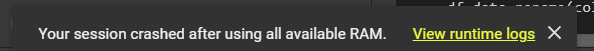
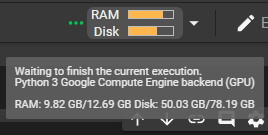

https://github.com/kexinhuang12345/DeepPurpose/blob/master/DEMO/Make-DAVIS-Correlation-Figure.ipynb

In [ ]:
X_drug, X_target, y  = dataset.process_BindingDB('../data/BindingDB_All.tsv',
                                         y = 'Kd', 
                                         binary = False, 
                                         convert_to_log = True)

Loading Dataset from path...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  after removing the cwd from sys.path.
b'Skipping line 1087314: expected 193 fields, saw 205\nSkipping line 1087340: expected 193 fields, saw 205\n'
b'Skipping line 1120033: expected 193 fields, saw 205\n'
b'Skipping line 1142701: expected 193 fields, saw 265\n'
b'Skipping line 1546347: expected 193 fields, saw 241\n'
b'Skipping line 1660234: expected 193 fields, saw 241\nSkipping line 1660235: expected 193 fields, saw 241\nSkipping line 1660236: expected 193 fields, saw 241\nSkipping line 1660237: expected 193 fields, saw 241\nSkipping line 1660238: expected 193 fields, saw 241\nSkipping line 1660239: expected 193 fields, saw 241\nSkipping line 1660240: expected 193 fields, saw 241\nSkipping line 1660241: expected 193 fields, saw 241\nSkipping line 1660242: expected 193 fields, saw 241\n'
b'Skipping line 1673507: ex

#AUPRC

In [ ]:
X_drug_BT, X_target_BT, y_BT = load_process_DAVIS('./data/', binary=True)

Beginning Processing...
Beginning to extract zip file...
Default binary threshold for the binding affinity scores are 30, you can adjust it by using the "threshold" parameter
Done!


In [ ]:
drug_encoding = 'CNN'
target_encoding = 'CNN'
train_BT, val_BT, test_BT = data_process(X_drug_BT, X_target_BT, y_BT, 
                                drug_encoding, target_encoding, 
                                split_method='random',frac=[0.7,0.1,0.2])
config = generate_config(drug_encoding = drug_encoding, 
                         target_encoding = target_encoding, 
                         cls_hidden_dims = [1024,1024,512], 
                         train_epoch = 100, 
                         LR = 0.001, 
                         batch_size = 256,
                         cnn_drug_filters = [32,64,96],
                         cnn_target_filters = [32,64,96],
                         cnn_drug_kernels = [4,6,8],
                         cnn_target_kernels = [4,8,12],
                        )
model = models.model_initialize(**config)

Drug Target Interaction Prediction Mode...
in total: 30056 drug-target pairs
encoding drug...
unique drugs: 68
encoding protein...
unique target sequence: 379
splitting dataset...
Done.


Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.70447. Total time 0.00055 hours
Validation at Epoch 1, AUROC: 0.81789 , AUPRC: 0.28773 , F1: 0.0 , Cross-entropy Loss: 1.83839
Training at Epoch 2 iteration 0 with loss 0.20845. Total time 0.02694 hours
Validation at Epoch 2, AUROC: 0.86174 , AUPRC: 0.36782 , F1: 0.0 , Cross-entropy Loss: 1.83839
Training at Epoch 3 iteration 0 with loss 0.16874. Total time 0.04861 hours
Validation at Epoch 3, AUROC: 0.87020 , AUPRC: 0.36855 , F1: 0.0 , Cross-entropy Loss: 1.83839
Training at Epoch 4 iteration 0 with loss 0.13890. Total time 0.07 hours
Validation at Epoch 4, AUROC: 0.86629 , AUPRC: 0.41167 , F1: 0.06060 , Cross-entropy Loss: 1.78094
Training at Epoch 5 iteration 0 with loss 0.12148. Total time 0.09027 hours
Validation at Epoch 5, AUROC: 0.87646 , AUPRC: 0.43326 , F1: 0.14942 , Cross-entropy Loss: 1.70051
Training at Epoch 6 iteration 0 with loss 0.09136. Total time 0.11083 hour

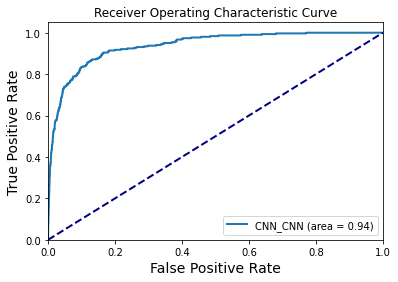

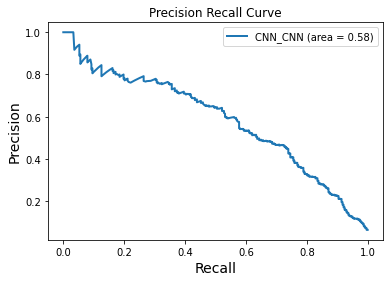

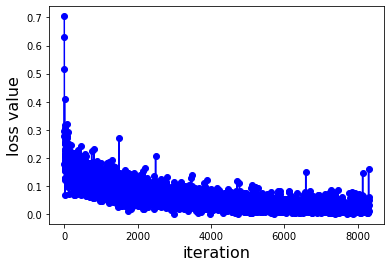

In [ ]:
model = models.model_initialize(**config)
model.train(train_BT, val_BT, test_BT)

In [ ]:
model


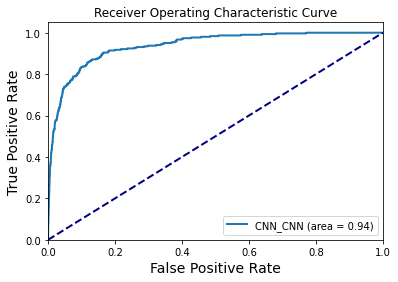

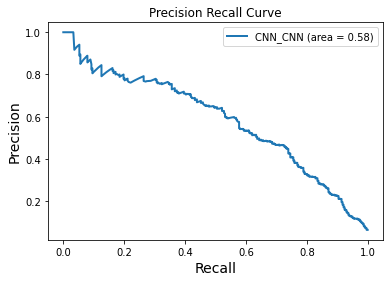

In [ ]:
from torch.utils import data

params = {'batch_size': 126,
	    		'shuffle': True,
	    		'num_workers': 1,
	    		'drop_last': False}

validation_generator = data.DataLoader(data_process_loader(test_BT.index.values,
                                                           test_BT.Label.values, test_BT, **model.config),
                                        **params)
# print(dir(net))
# print(net.binary)
a = model.test_(validation_generator, model.model, test=True)

In [ ]:
for i in a:
  print(i)

0.937372652822395
0.5844991349698367
0.5617977528089888
1.344558050873557
[1.6798149538033158e-09, 0.00010173679038416594, 4.038860197397298e-07, 6.41493124931003e-06, 6.964455123714686e-10, 1.3265770704151691e-08, 5.5396940696781846e-14, 2.4259079509647563e-06, 0.0009948972146958113, 0.3370223939418793, 7.46741279726848e-05, 3.107393628434124e-13, 1.3011982823738878e-17, 3.671027037910335e-09, 7.327842467930168e-06, 0.008405343629419804, 1.5727514437458012e-06, 1.254687776032048e-15, 3.926280811583638e-08, 0.008569465018808842, 0.3903025984764099, 2.6254988938489987e-07, 3.0131355310131225e-12, 1.481316530771437e-06, 4.447449006295123e-11, 1.561482531542424e-05, 0.022738048806786537, 1.9942351627832977e-06, 3.8240315455200305e-14, 9.426627637114035e-14, 0.0005864592967554927, 0.00015620845078956336, 0.000265608134213835, 4.271599740590659e-11, 8.536370721401454e-09, 2.0353380023152567e-05, 8.698723408251396e-10, 1.163543394966382e-08, 8.868542705764426e-11, 1.1480976561841018e-17, 0.0

In [ ]:
model.save_model('./result/')